### 객체인식-특징점 검출

In [5]:
import cv2
a = cv2.imread("c:/workspace3/data/images/same_1.jpg")
img = cv2.imread("c:/workspace3/data/images/same_2.jpg")
img=cv2.resize(img, (640, 480))
img_object = cv2.imread("c:/workspace3/data/images/same_1.jpg", cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#특징점 검출 알고리즘
orb = cv2.ORB_create(nfeatures=40000)
#특징점과 특징 디스크립터 계산
#특징 디스크립터(feature descriptor) : 특징점 주변 픽셀을 일정한 크기의 블록으로 나누어 각 블록에 속한 픽셀의 그레디언트 히스토그램을 계산한 것(특징점 주변의 밝기, 색상, 방향, 크기 등의 정보)
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(img_object, None)
#유사도 계산
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
count = 100
for i in matches[:count]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(img, (int(x1), int(y1)), 3, (0, 0, 255), 3)

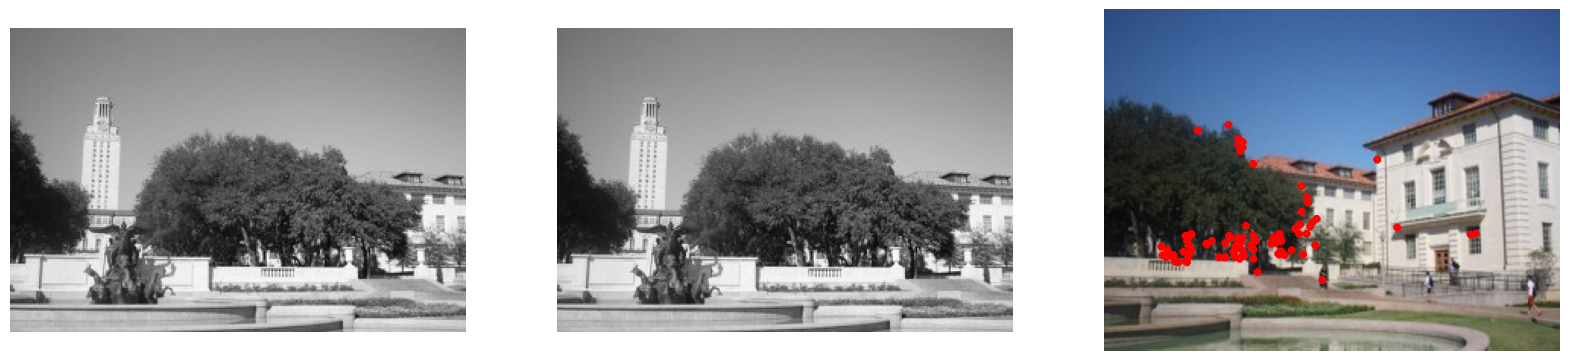

In [6]:
import matplotlib.pyplot as plt

a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(a,cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_object,cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img)
plt.axis("off")
plt.show()
